In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.special as spe
from scipy.optimize import fsolve

In [3]:
def continuidad(x, l, rho):
    y=rho*np.sqrt(x+1)
    z=rho*np.sqrt(-x)
    g=y*spe.spherical_jn(l,y,derivative=True)/spe.spherical_jn(l,y)
    h=z*spe.spherical_kn(l,z,derivative=True)/spe.spherical_kn(l,z)
    f=g-h
    return f

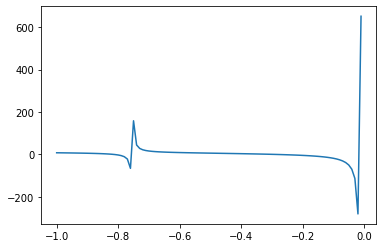

In [4]:
plt.figure()
x=np.arange(-1,0,0.01)
plt.plot(x, continuidad(x, 0, np.sqrt(40)))

In [5]:
continuidad(-0.678, 0, np.sqrt(20))

0.003709152935170046

In [6]:
def hallarCeros(f,l, rho,toi=0.0005):
    g=np.arange(-0.99999,0, 0.00001)
    ceros=[]
    for i in range(len(g)):
        if np.abs(f(g[i],l,rho))<toi:
            ceros.append(np.round(g[i],3))       
    zeros=np.unique(ceros) 
    return zeros
hallarCeros(continuidad, 1, np.sqrt(40))

array([-0.63 , -0.006])

In [ ]:
plt.figure()
rho=np.sqrt(np.arange(40,90,10))
l=np.arange(0,6,1)
for i in range(len(rho)):
    y=hallarCeros(continuidad, l[0], rho[i])
    x=np.ones(len(y))*l[0]
    for j in range(1,len(l)):
        a=hallarCeros(continuidad, l[j], rho[i])
        y=np.concatenate((y,a))
        x=np.concatenate((x,np.ones(len(a))*l[j]))
    print(x,y)
    plt.scatter(x,y, s=700, marker="_", label=r"$V_0=${}".format(round(rho[i]**2, 0)))
plt.legend()
plt.ylabel(r"$\epsilon(E/V_0)$")
plt.xlabel("l")
plt.savefig("estadosLigados.png")

[0. 0. 1. 1. 2. 3.] [-0.818 -0.3   -0.63  -0.006 -0.399 -0.131]
[0. 0. 1. 1. 2. 3. 4.] [-0.85  -0.414 -0.694 -0.14  -0.501 -0.274 -0.018]


In [9]:
def tanDl(x, l, rho):
    y=rho*np.sqrt(x+1)
    z=rho*1j*np.sqrt(-x)
    g=y*spe.spherical_jn(l,z)*spe.spherical_jn(l,y, derivative=True)-z*spe.spherical_jn(l,z, derivative=True)*spe.spherical_jn(l,y)
    h=z*spe.spherical_yn(l,z, derivative=True)*spe.spherical_jn(l,y)-y*spe.spherical_jn(l,y,derivative=True)*spe.spherical_yn(l,z)
    f=-g/h
    return f
    

In [10]:
def sigma(x, rho):
    s=0
    for i in range(100):
        d=tanDl(x,i,rho)/(np.sqrt(1+tanDl(x,i,rho)**2))
        s+=-4*np.pi*(2*i+1)*(abs(d))**2/(rho**2*x)
    return s

In [42]:
x=np.arange(-0.9999,0.0,0.0001)
C=np.zeros((len(rho), len(x)))
for i in range(len(rho)):
    C[i]=sigma(x,rho[i])

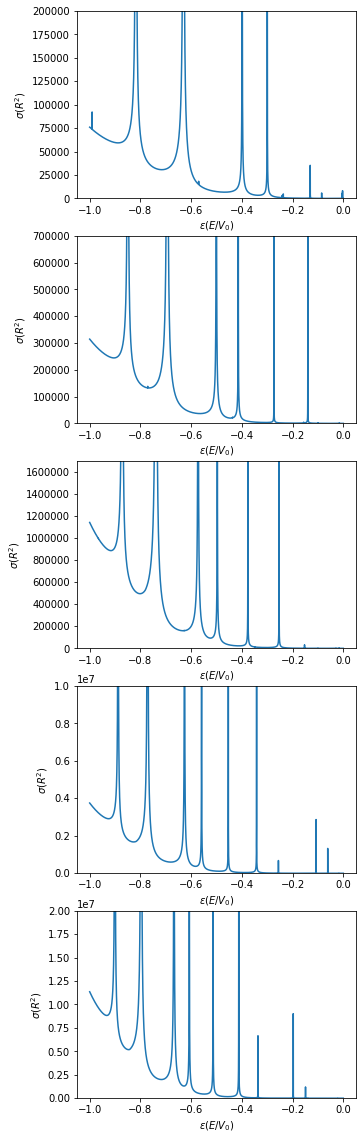

In [46]:
plt.figure(figsize=(5,20))
limites=np.array([200000,700000,1700000,10000000,20000000])
for i in range(len(rho)):
    plt.subplot(len(rho),1,i+1)
    plt.plot(x, C[i])
    plt.ylim(0,limites[i])
    plt.xlabel(r"$\epsilon(E/V_0)$")
    plt.ylabel(r"$\sigma(R^2)$")
plt.savefig("scatteringPlot.png")    

In [59]:
x[sigma(x,np.sqrt(40))>200000]

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


array([-0.8226, -0.8225, -0.8224, -0.8223, -0.8222, -0.8221, -0.822 ,
       -0.8219, -0.8218, -0.8217, -0.8216, -0.8215, -0.8214, -0.8213,
       -0.8212, -0.8211, -0.821 , -0.8209, -0.8208, -0.8207, -0.8206,
       -0.8205, -0.8204, -0.8203, -0.8202, -0.8201, -0.82  , -0.8199,
       -0.8198, -0.8197, -0.8196, -0.8195, -0.8194, -0.8193, -0.8192,
       -0.8191, -0.819 , -0.8189, -0.8188, -0.8187, -0.8186, -0.8185,
       -0.8184, -0.8183, -0.8182, -0.8181, -0.818 , -0.8179, -0.8178,
       -0.8177, -0.8176, -0.8175, -0.8174, -0.8173, -0.8172, -0.8171,
       -0.817 , -0.8169, -0.8168, -0.8167, -0.8166, -0.8165, -0.8164,
       -0.8163, -0.8162, -0.8161, -0.816 , -0.8159, -0.8158, -0.8157,
       -0.8156, -0.8155, -0.8154, -0.8153, -0.8152, -0.8151, -0.815 ,
       -0.8149, -0.8148, -0.8147, -0.8146, -0.8145, -0.8144, -0.8143,
       -0.8142, -0.8141, -0.814 , -0.8139, -0.8138, -0.8137, -0.8136,
       -0.8135, -0.8134, -0.8133, -0.6353, -0.6352, -0.6351, -0.635 ,
       -0.6349, -0.6

In [22]:
x

array([0.9999])